# Regression 

**Let us import the necessary libraries and read the data.**

In [49]:
from sklearn.datasets import load_boston
boston = load_boston()

In [50]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


**Now for some basic information about the data.**

In [51]:
print(boston.data.shape)

(506, 13)


In [52]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [53]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Now let us prepare the data for analysis**

In [54]:
import pandas as pd
bos = pd.DataFrame(boston.data)

In [55]:
#add header to it
bos.columns = boston.feature_names
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [56]:
print(boston.target.shape)

(506,)


In [57]:
# add target variable
bos['Price'] = boston.target
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


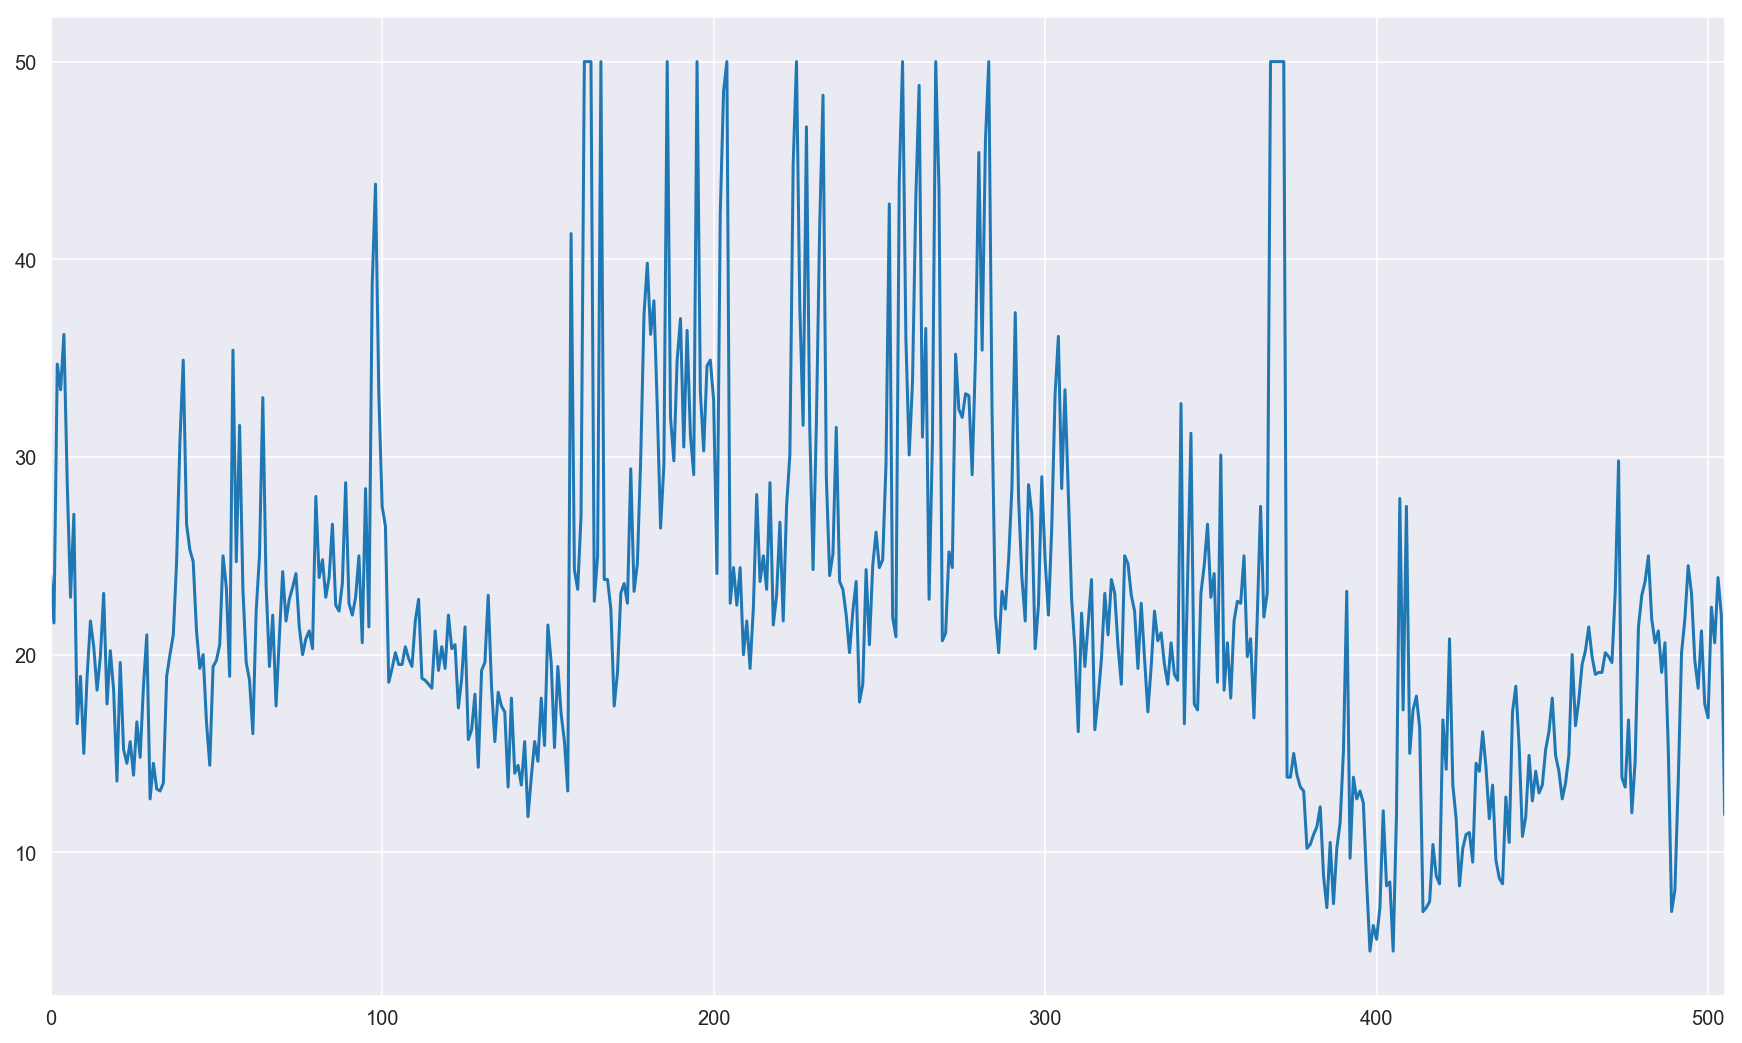

In [58]:
import matplotlib.pyplot as plt
bos['Price'].plot(kind='line')
plt.show()

In [59]:
bos['Price'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Price, dtype: float64

Now le t us calculate the interquartile range and establish the outlier range at beyond the limits:

$$(Q1 - 1.5(IQR), Q3 + 1.5(IQR))$$ 

In [60]:
## Outlier calculation , Q3+1.5IQR and Q1 - 1.5IQR 
Upper_limit = 25 + 1.5 * (25-17)
Lower_limit = 17 - 1.5 * (25-17)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 37.0
Lower_limit : 5.0


In [61]:
df1 = bos[bos['Price']>37]
print(df1.shape)
df2 = bos[bos['Price']<5]
print(df2.shape)

(37, 14)
(0, 14)


#### Removal of outliers

In [62]:
bos = bos[bos['Price']<37]

In [63]:
bos.shape

(468, 14)

## Linear Regression

Now that the data is ready for analysis let us go ahead and fit the model.

In [64]:
## split the input and output data into 2 different variable 
X = bos.drop('Price', axis=1)
y= bos['Price']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#### Coefficient of the regression model

In [66]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-1.14900673e-01  3.85237927e-02 -3.58939204e-02  1.06257169e+00
 -1.19829556e+01  1.87511792e+00 -1.96250032e-02 -1.01960573e+00
  2.32835158e-01 -1.20652826e-02 -6.98655798e-01  6.92839423e-03
 -3.78507286e-01]
Intercept: 39.70944712964065
R^2 score: 0.767217865238647


## Split the data into train and test

In [67]:
from sklearn.model_selection import train_test_split
# train data - 70% and test data - 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(327, 13)
(141, 13)
(141,)


In [68]:
# R square value for both train and test data to check if the model
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.7622494249650256
R^2 score for test: 0.76464237601183


Based on the R<sup>2</sup> obtained in the model, the performance is similar for train and test. SO there might not be an overfitting problem.

## Assumptions For linear Regression

In [69]:
## Raw OLS Model

In [70]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 04 Sep 2019   Prob (F-statistic):          1.59e-134
Time:                        13:39:08   Log-Likelihood:                -1199.8
No. Observations:                 468   AIC:                             2428.
Df Residuals:                     454   BIC:                             2486.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7094      3.610     11.001      0.000      32.616      46.803
CRIM          -0.1149      0.022     -5.180      0.000      -0.158      -0.071
ZN             0.0385      0.010      3.762      0.000       0.018       0.059
INDUS         -0.0359      0.043     -0.834      0.405      -0.120       0.049
CHAS           1.0626      0.643      1.651      0.099      -0.202       2.327
NOX          -11.9830      2.623     -4.569      0.000     -17.137      -6.829
RM             1.8751      0.336      5.574      0.000       1.214       2.536
AGE           -0.0196      0.009     -2.107      0.036      -0.038      -0.001
DIS           -1.0196      0.141     -7.212      0.000      -1.297      -0.742
RAD            0.2328      0.046      5.102      0.000       0.143       0.323
TAX           -0.0121      0.003     -4.655      0.000      -0.017      -0.007
PTRATIO       -0.6987      0.092     -7.607      0.000      -0.879      -0.518
B              0.0069      0.002      3.826      0.000       0.003       0.010
LSTAT         -0.3785      0.037    -10.364      0.000      -0.450      -0.307
==============================================================================
Omnibus:                       48.469   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.117
Skew:                           0.698   Prob(JB):                     8.05e-17
Kurtosis:                       4.360   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Check the Asumptions of Linear Regression

For Linear Regression, we need to check if the 5 major assumptions hold.

1. No Auto correlation
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity
5. No strong MultiCollinearity


##### Assumption 1- No autocorrelation

1) No Auto correlation. 

Test needed : Durbin- Watson Test.

- It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.
- If the value ranges from 2-4, it is known as Negative autocorrelation.
- If the value is exactly 2, it means No Autocorrelation.
- For a good linear model, it should have low or no autocorrelation.

we can see here the values of dublin watson test (test for normality): 1.240 (POSITIVE AUTO-CORRELATION)
    
From the graph below, we can easily see that there is somewhat Positive autocorrelation.

1.Negative autocorrelation results in alternating pattern.
2.Positive autocorrelation results in Cyclic pattern.

For more than one order until 3rd order we use Breusch-Godfrey test

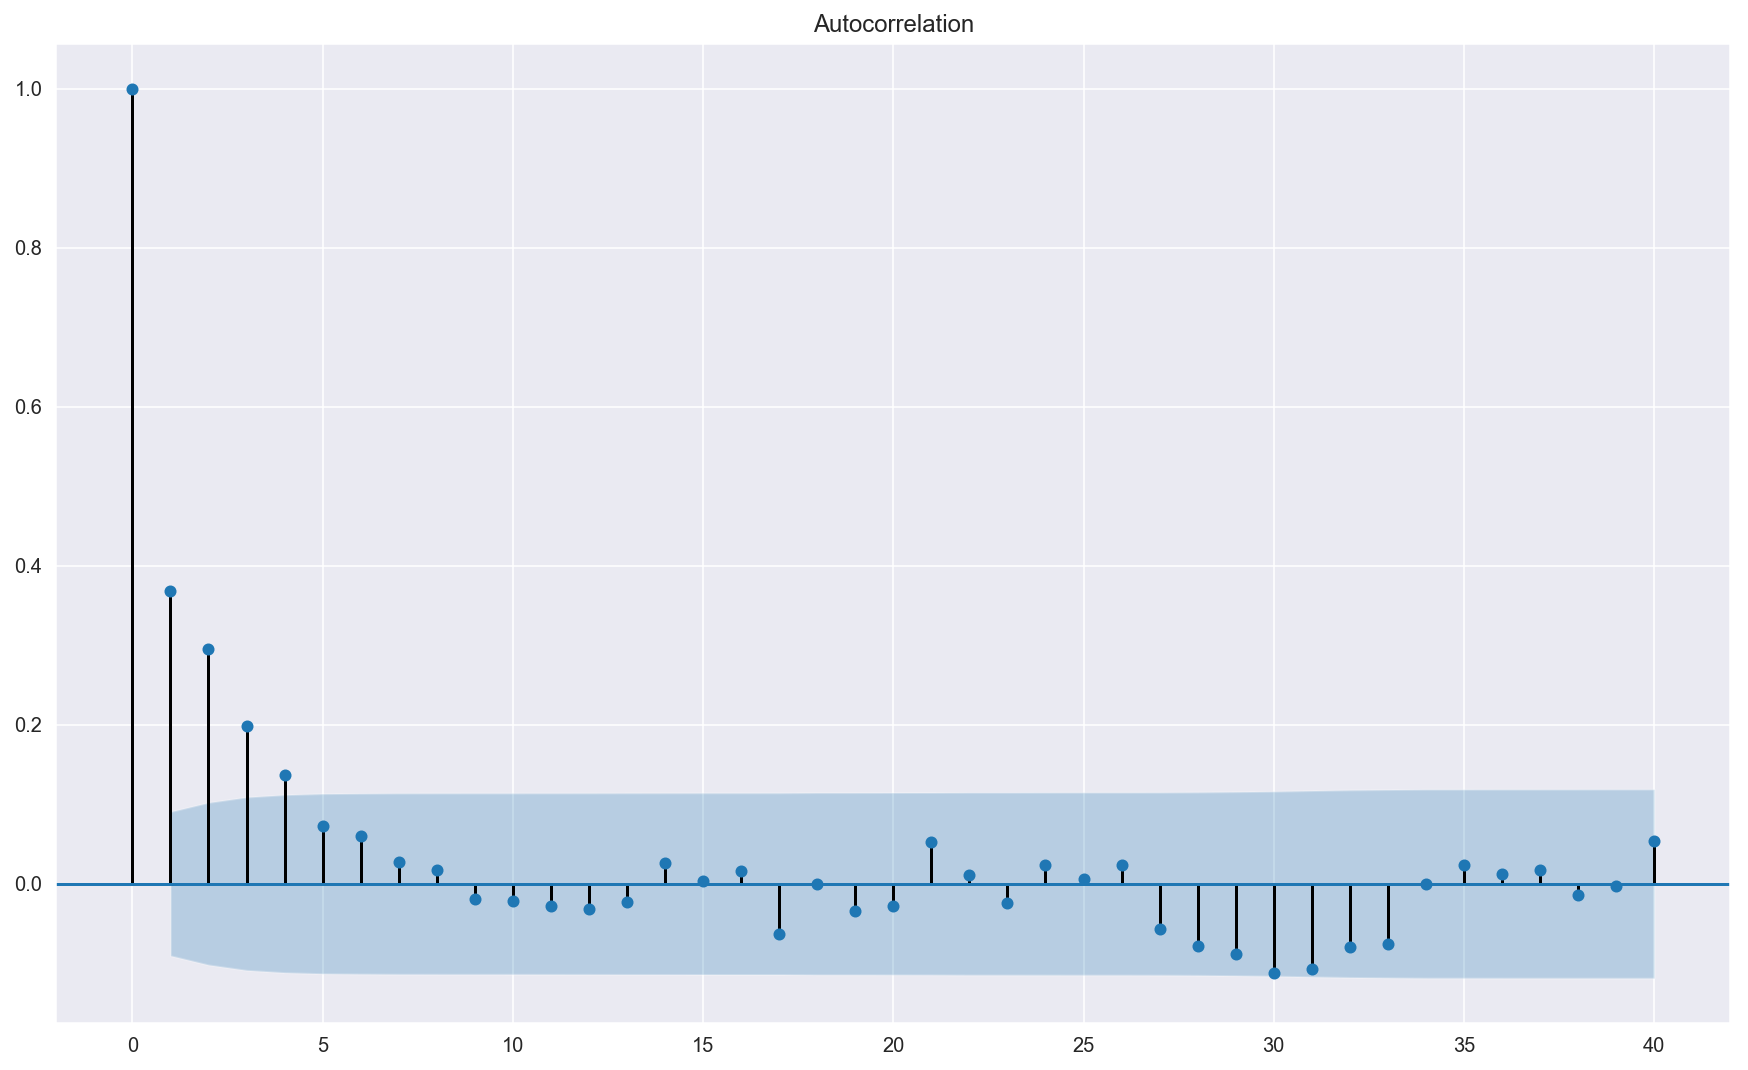

In [71]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40)
acf.show()

##### Assumption 2- Normality of Residuals

2) The second assumption is the Normality of Residuals / Error terms.

For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed.
The higher the value of Jarque Bera test , the lesser the residuals are normally distributed.
We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.
    
The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

In [72]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(74.11700927735114, 1.1102230246251565e-16)


The critical chi square value at the 5% level of significance is 5.99. If the computed value exceeds this value the null hypothesis is rejected.

- Null - Error terms are normally distributed.
- Alt - Error terms are not normally distributed.


In this case the computed value of the JB statistic 74.11 is greater than 5.99. Thus we reject the null hypothesis that the error terms are normally distributed.

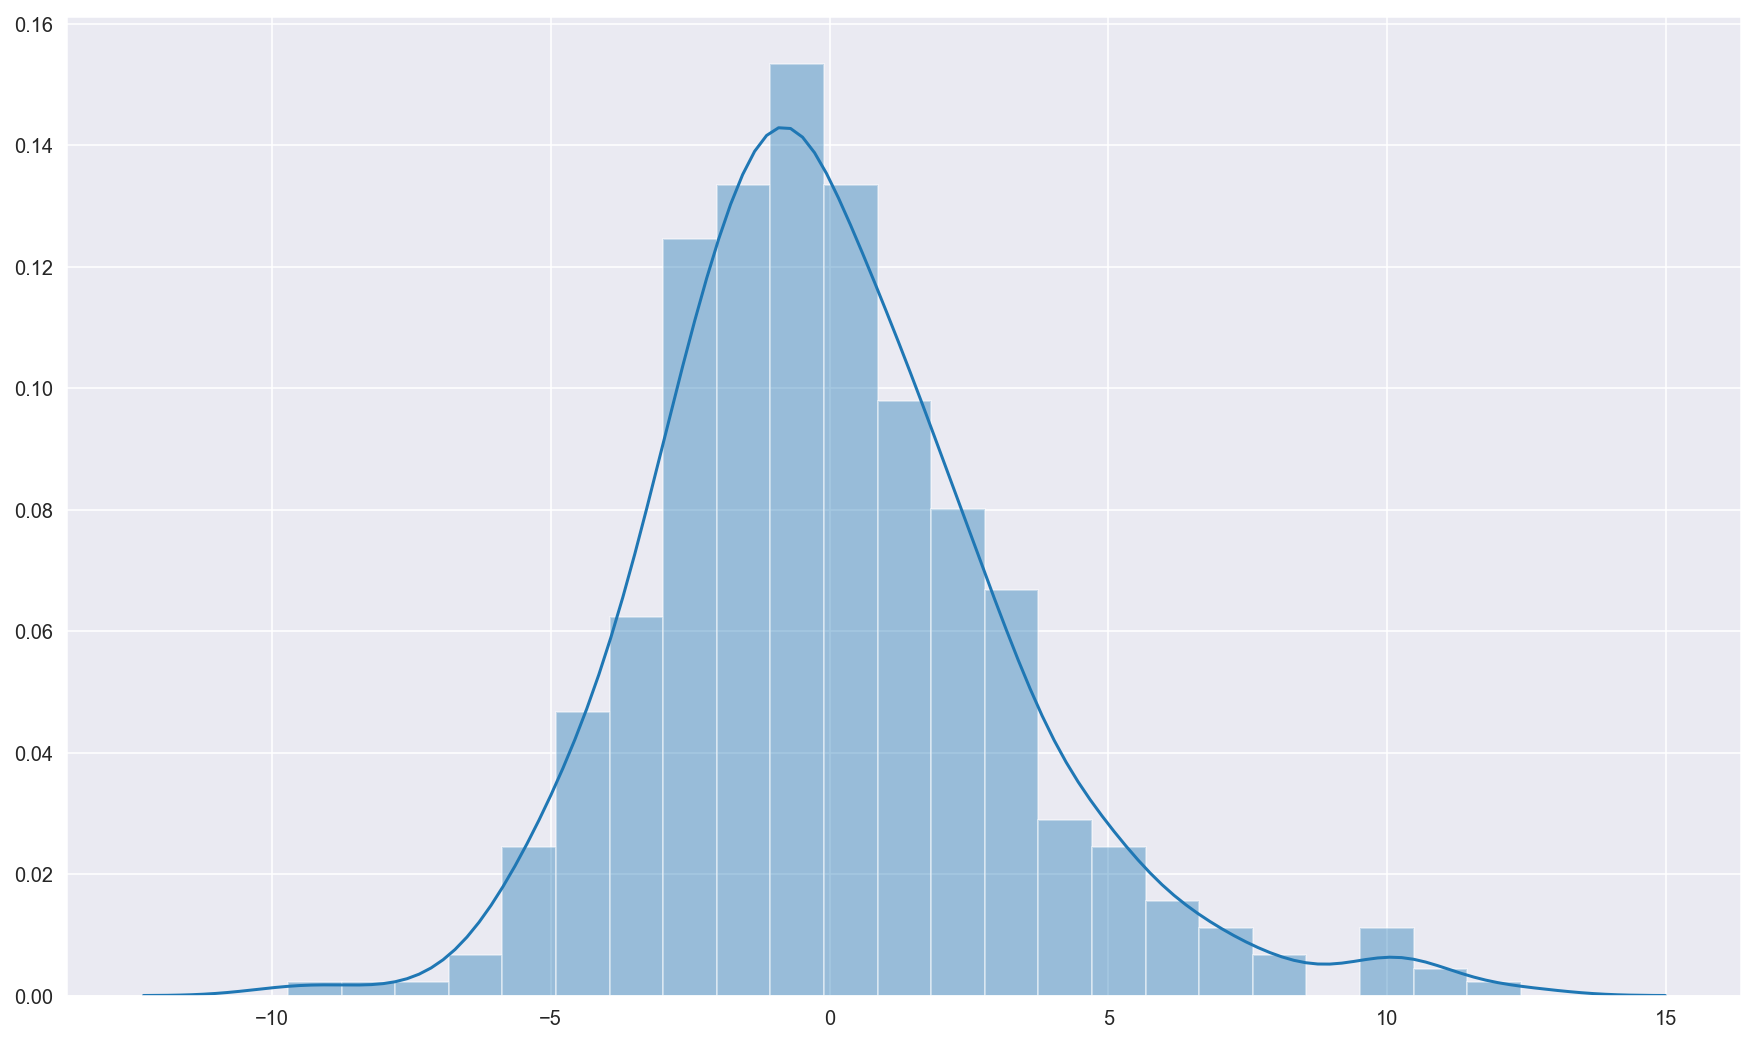

In [73]:
import seaborn as sns

sns.distplot(lin_reg.resid)
plt.show()

As, we can see from the second warning of OLS model itself that Multicollinearity is present in the dataset.
It can also be stated by noting the high conditional number.

## Asssumption 3 - Linearity of residuals
Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals.
OR
We can go for rainbow test. Let's look both of them one by one.

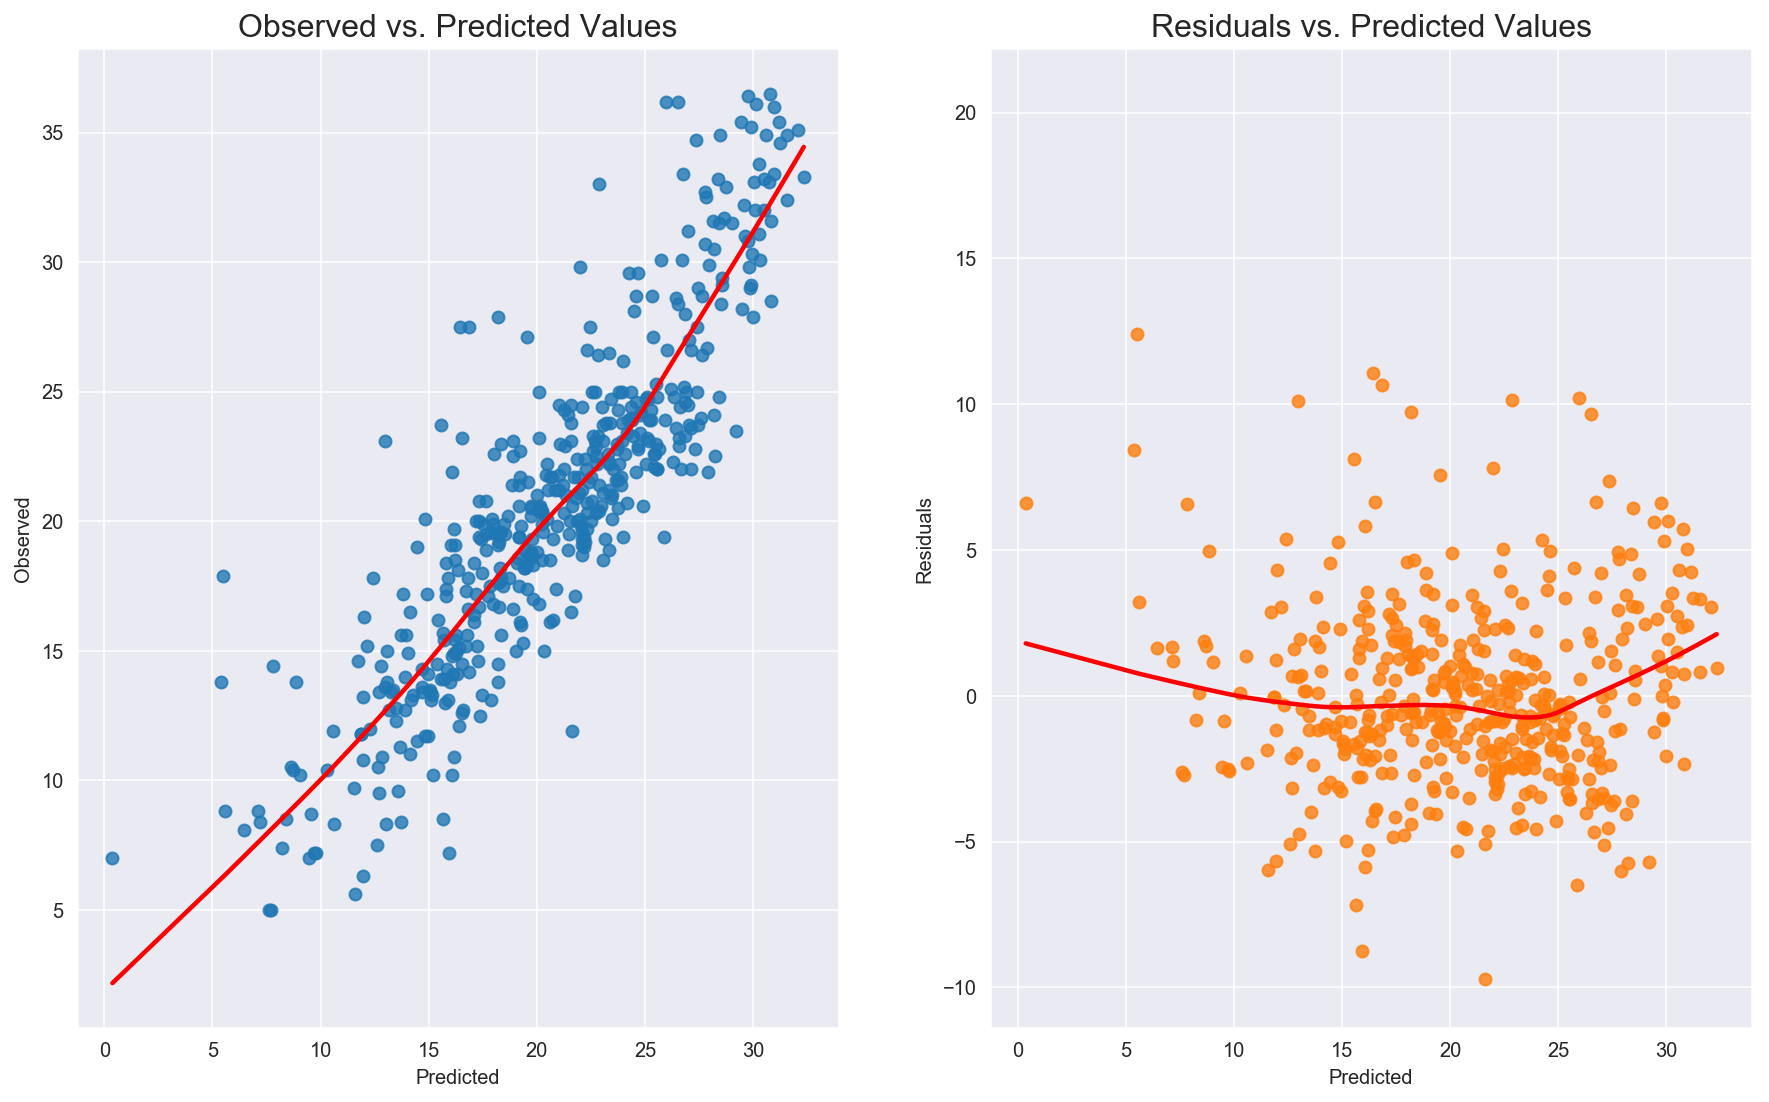

In [74]:
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

To detect nonlinearity one can inspect plots of observed vs. predicted values or residuals vs. predicted values. 
The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or 
around horizontal line in the latter one. 
In both cases linearity of residuals can be seen.

#### Rainbow test 

It is done to check the linearity of the residuals for a linear regression model.
Linearity of residuals is preferred.

- The Null hypothesis is that the regression is correctly modelled as linear.
- The alternate hypothesis is that the regression is not linear.

In [75]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg)

(1.128950914014356, 0.18139868974213996)

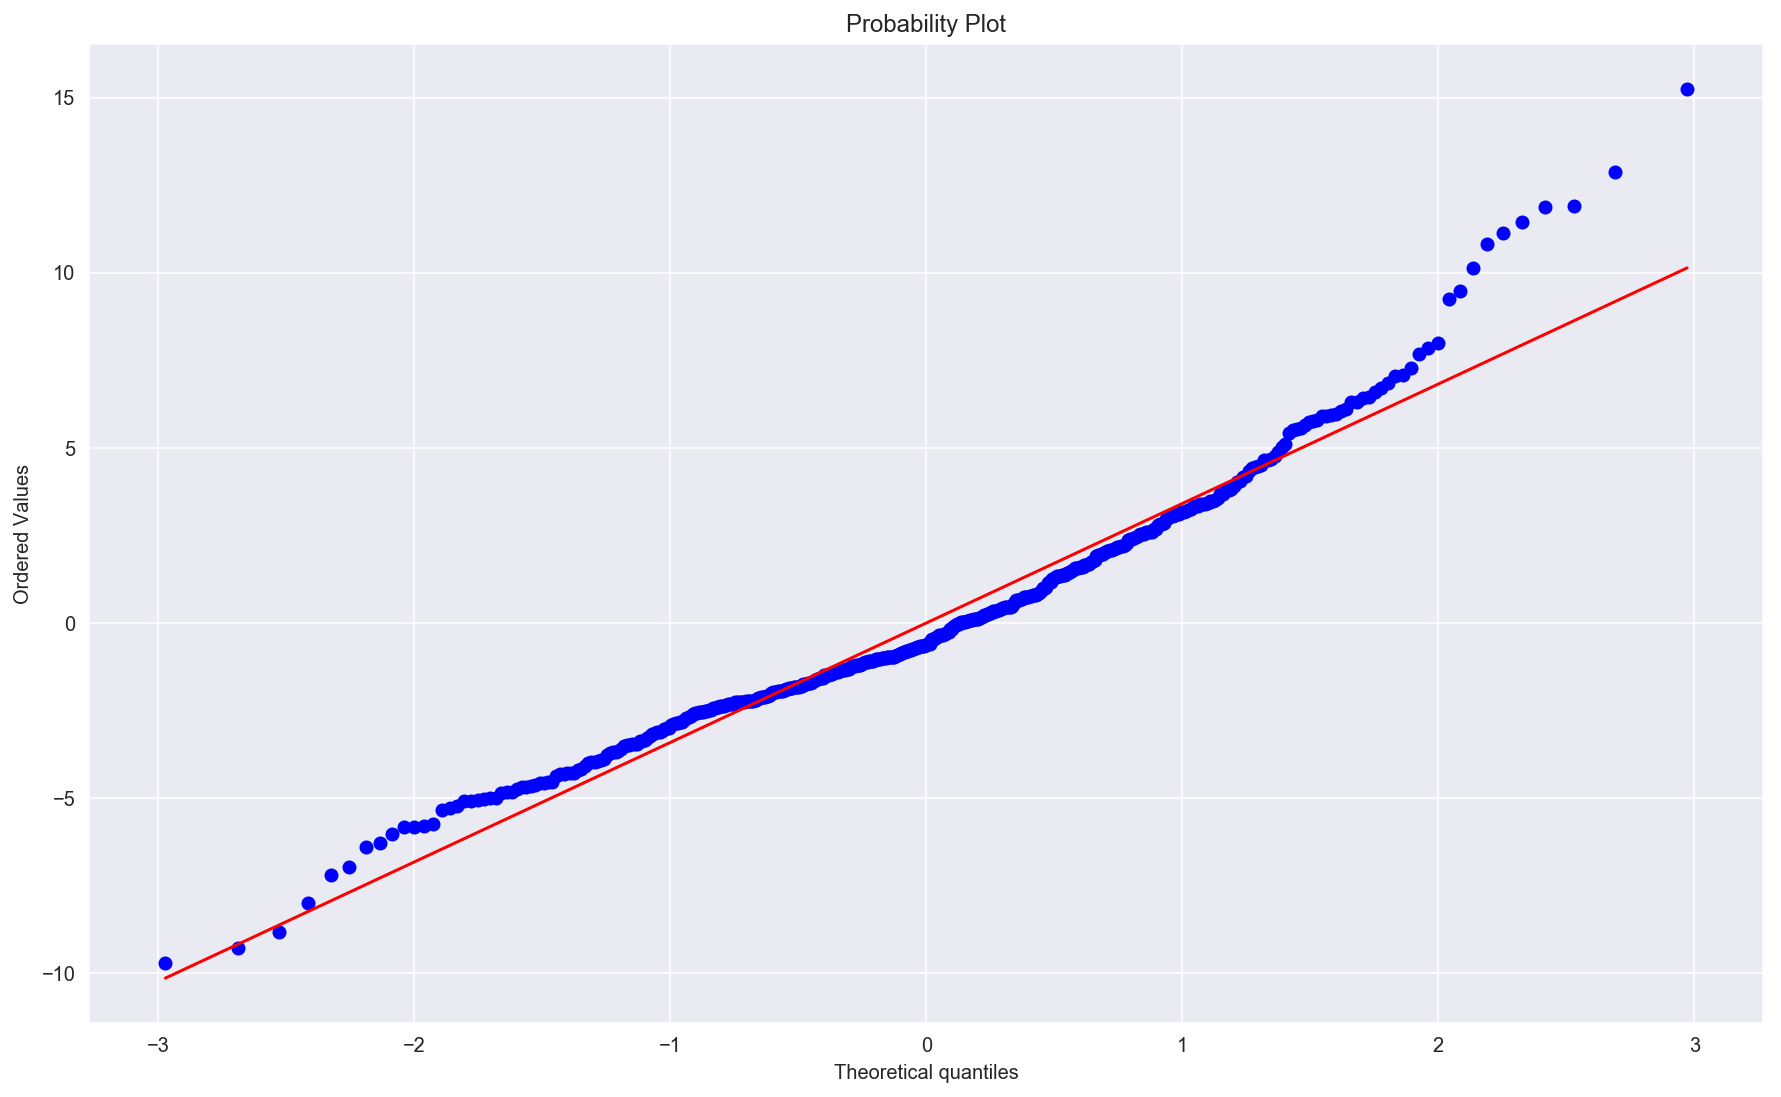

In [99]:
import scipy.stats as stats
stats.probplot(lin_reg.resid,plot=plt)
plt.show()

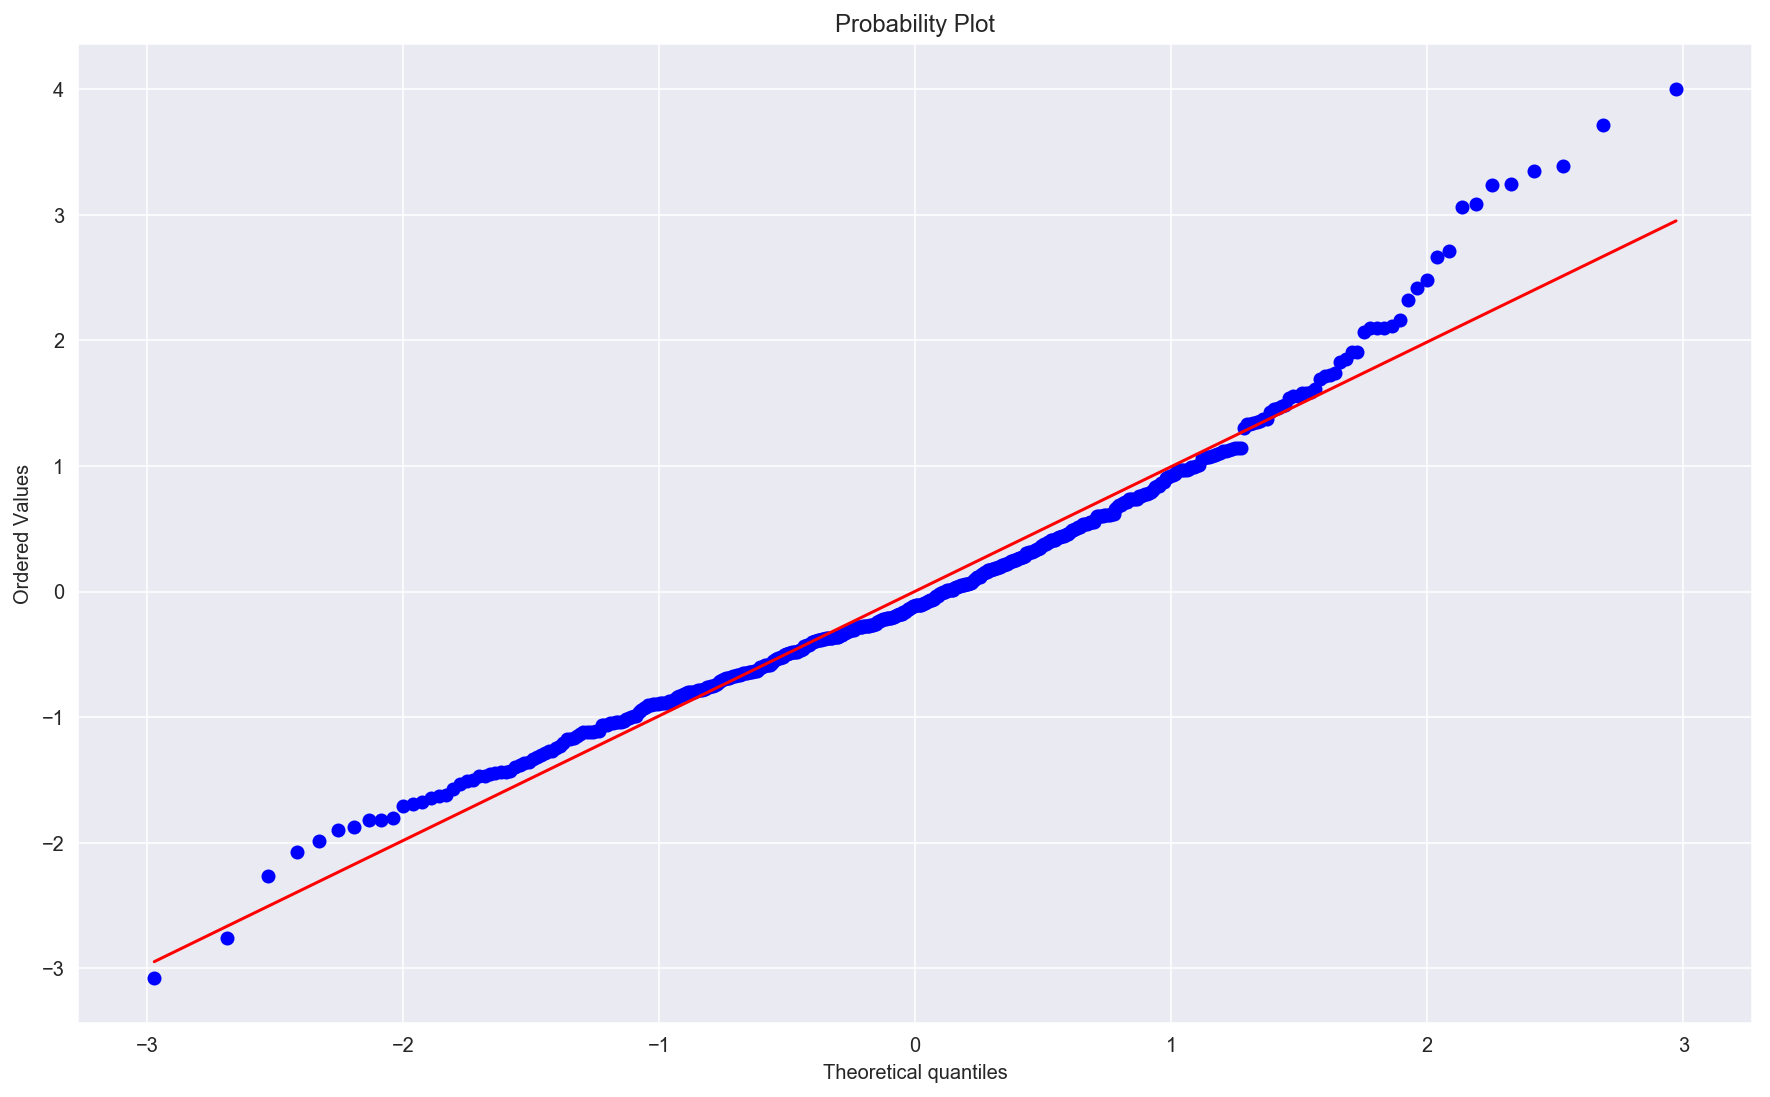

In [76]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

    EXPECTATION : THE MEAN VALUE OF THE RESIDUALS SHOULD BE ZERO.
    LET's CHECK

In [77]:
lin_reg.resid.mean()

2.1266938827264108e-14

Very much close to zero. -1.11 * 10^(-14)

So, linearity is present.

##### Assumption 4 -  Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)
Homoscedacity :: If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity :: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are:
$$ H_{0} : \sigma_{u_{i}}~is~constant~across~the~range~of~data $$

$$ H_{a} : \sigma_{u_{i}}~is~not~constant~across~the~range~of~data $$

The residuals should be homoscedastic.


##### Goldfeld Test

[('F statistic', 1.8074717342143707), ('p-value', 6.698399001481078e-06)]

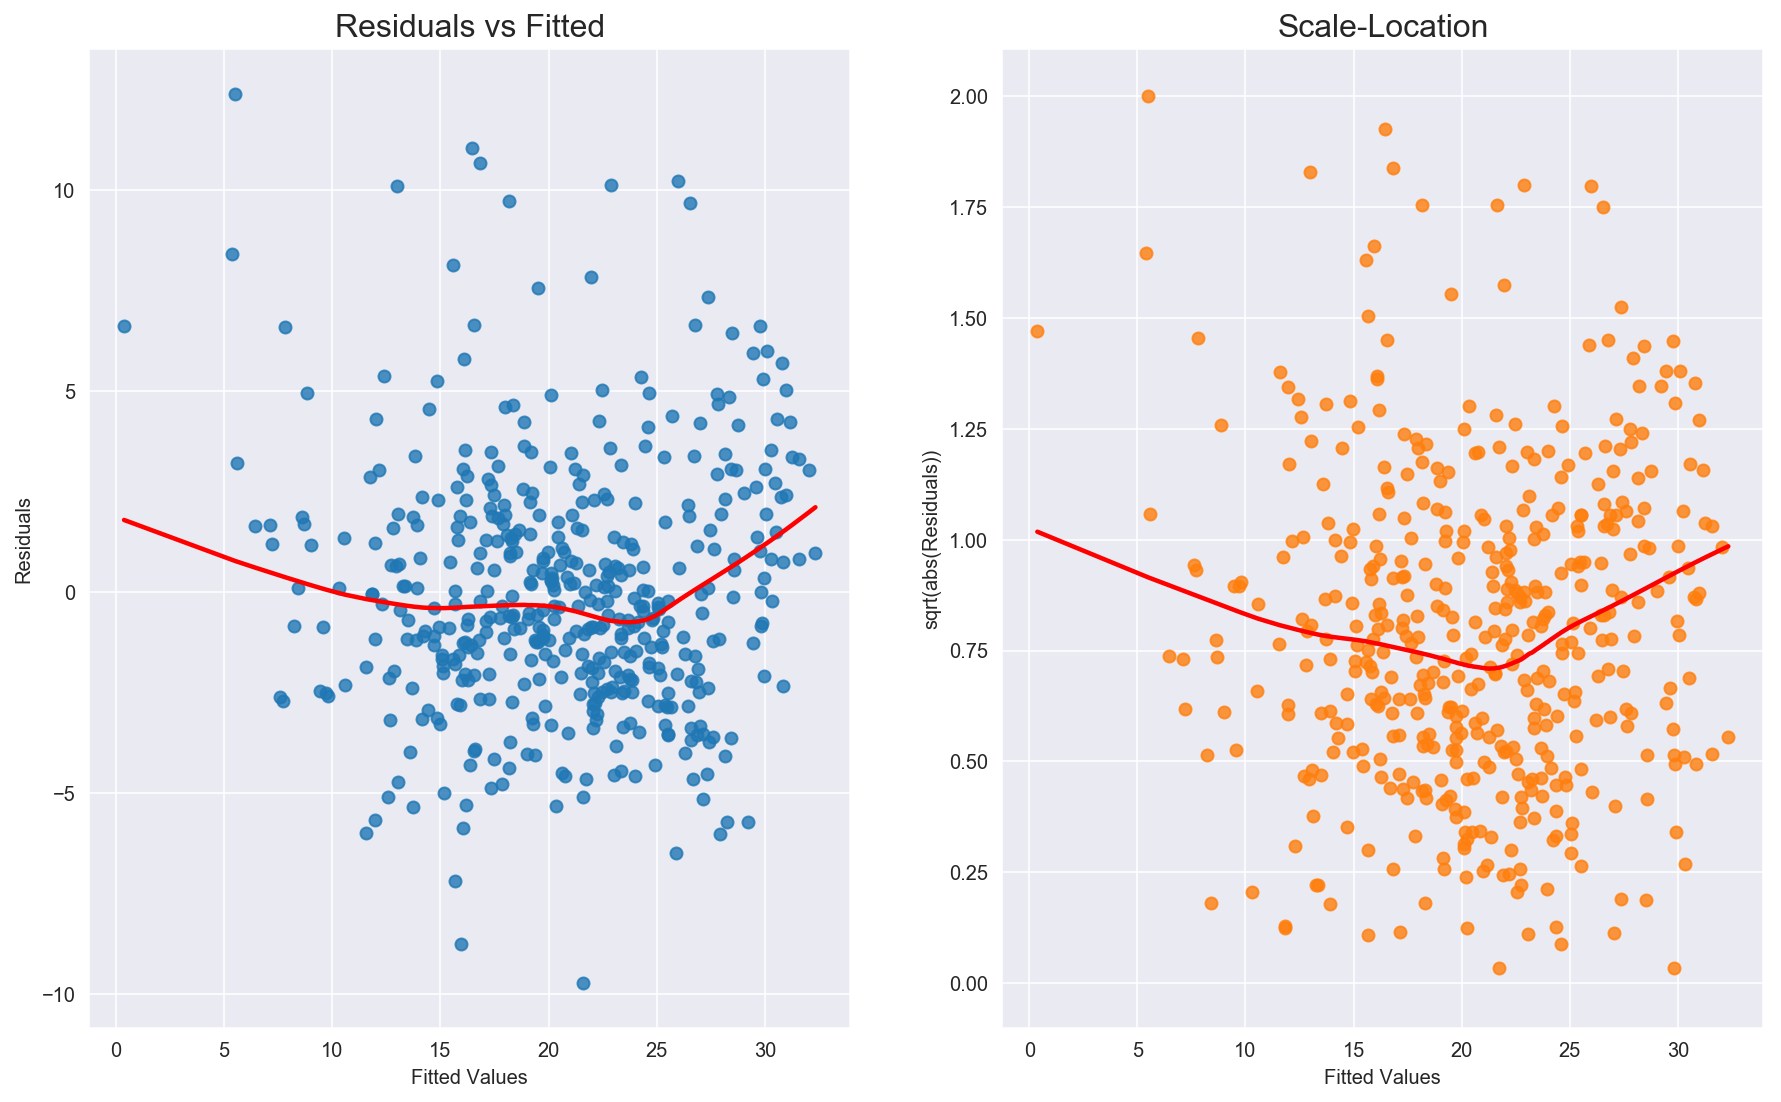

In [78]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

In [104]:
lin_reg.model.exog.shape

(468, 8)

We can also use two statistical tests: Breusch-Pagan and Goldfeld-Quandt. In both of them the null hypothesis assumes  homoscedasticity and a p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

Here, p value is less than 0.05 so, it is homoscedasticity distribution.

$$ H_{0} : \sigma_{u_{i}}~is~constant~across~the~range~of~data $$

$$ H_{a} : \sigma_{u_{i}}~is~not~constant~across~the~range~of~data $$

##### Assumption 5- NO  MULTI COLLINEARITY

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.785945,2.359022,3.920387,1.071018,4.357472,1.726046,3.134089,4.146155,7.4409,8.805062,1.644963,1.343911,2.982265


So, multicollinearity exists.

Note : This vif column has be built with the help of X_constant and not the X_values. Because we built our model by adding Constant.

In [80]:
import seaborn as sns

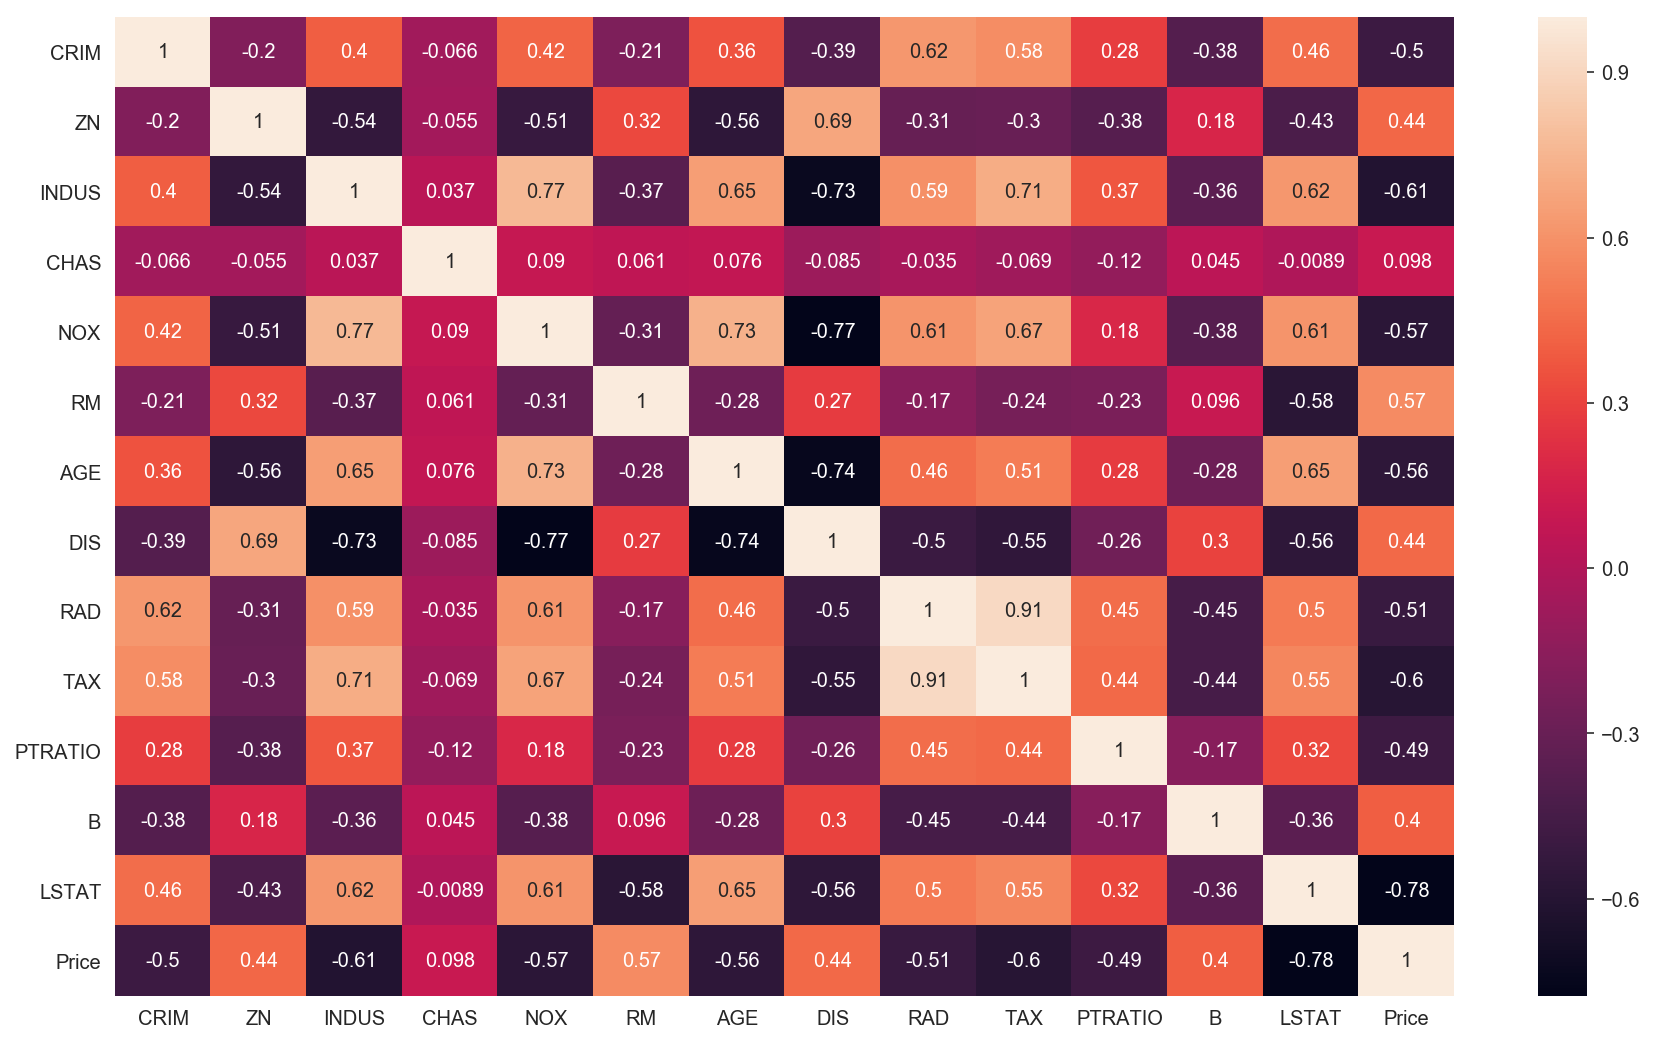

In [81]:
sns.heatmap(bos.corr(), annot=True)

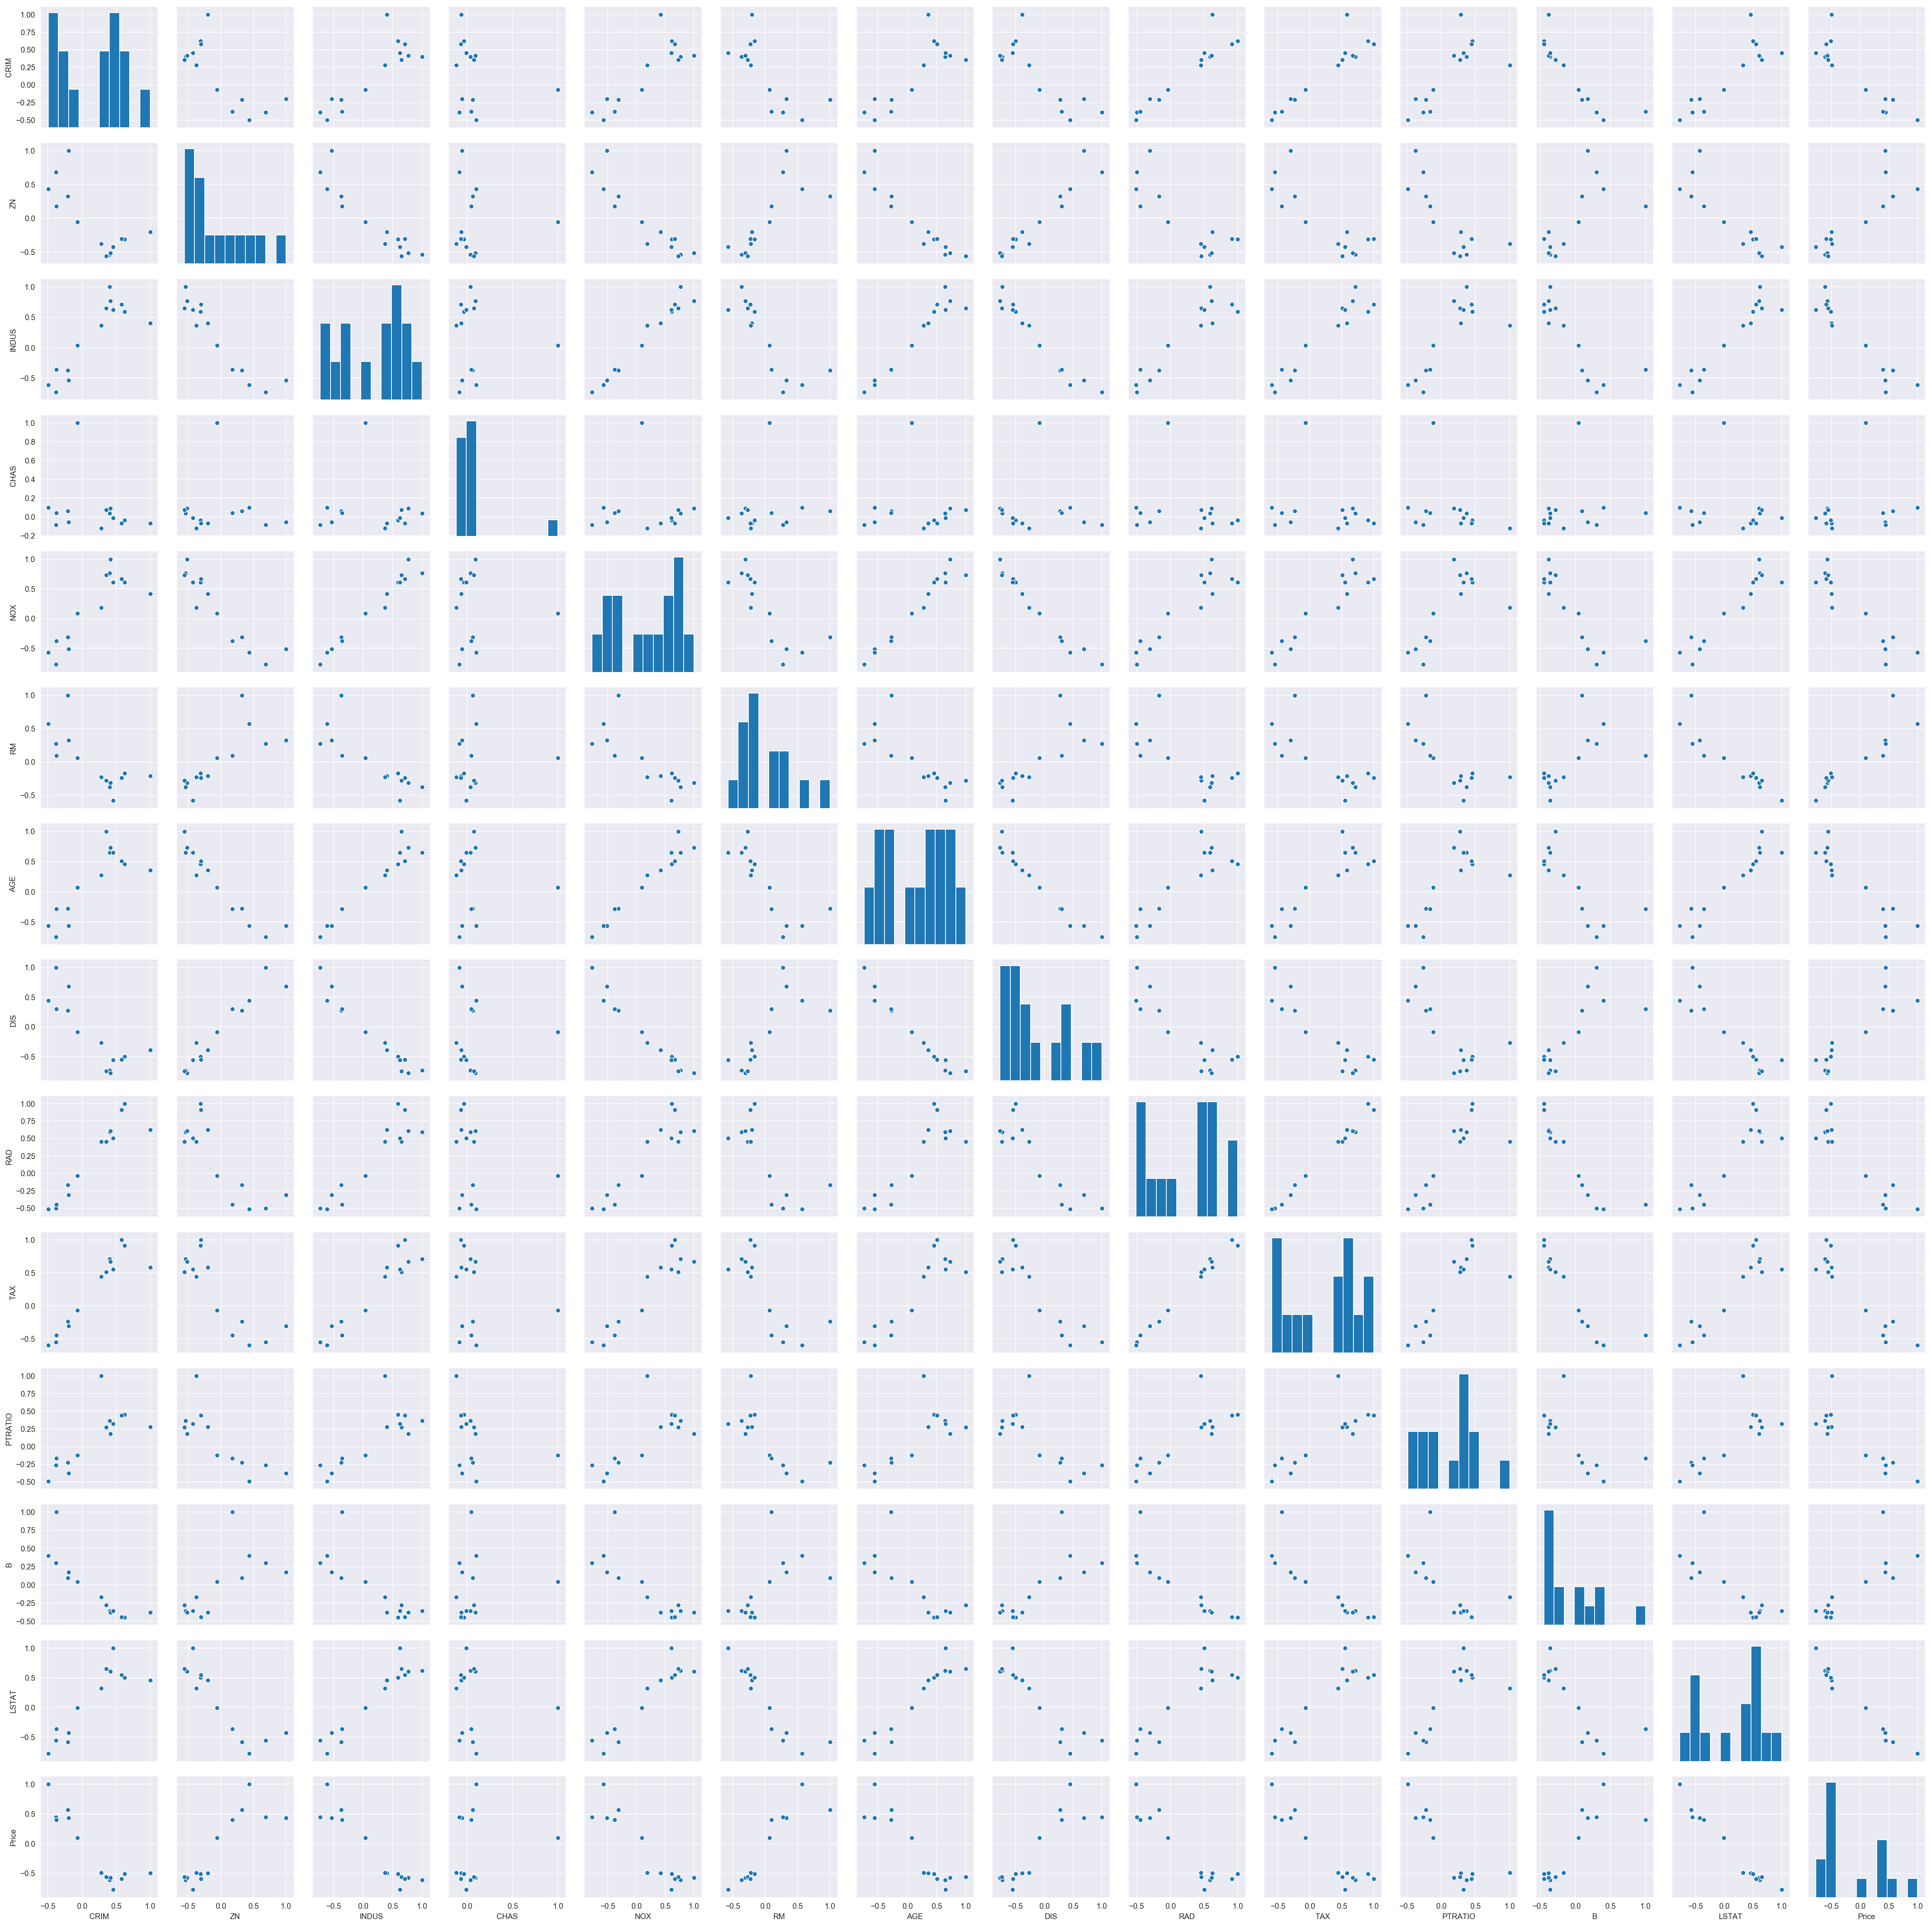

In [82]:
sns.pairplot(bos.corr())

In [83]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [84]:
##  removed like correlated variables
X = bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
       'PTRATIO', 'B', 'LSTAT']]
y = bos['Price']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-9.13916159e-02  2.91816018e-02 -1.06816044e-01  1.45583701e+00
 -1.08932678e+01  2.08712864e+00 -2.31107230e-02 -1.00719100e+00
 -6.51942590e-01  6.51622232e-03 -3.71267240e-01]
Intercept: 35.22754220965523
R^2 score: 0.7533225226990985


In [85]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     126.6
Date:                Wed, 04 Sep 2019   Prob (F-statistic):          5.89e-131
Time:                        13:40:05   Log-Likelihood:                -1213.4
No. Observations:                 468   AIC:                             2451.
Df Residuals:                     456   BIC:                             2501.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2275      3.474     10.140      0.000      28.401      42.055
CRIM          -0.0914      0.021     -4.416      0.000      -0.132      -0.051
ZN             0.0292      0.010      2.872      0.004       0.009       0.049
INDUS         -0.1068      0.040     -2.663      0.008      -0.186      -0.028
CHAS           1.4558      0.654      2.224      0.027       0.170       2.742
NOX          -10.8933      2.537     -4.294      0.000     -15.878      -5.908
RM             2.0871      0.339      6.149      0.000       1.420       2.754
AGE           -0.0231      0.010     -2.431      0.015      -0.042      -0.004
DIS           -1.0072      0.145     -6.937      0.000      -1.293      -0.722
PTRATIO       -0.6519      0.087     -7.493      0.000      -0.823      -0.481
B              0.0065      0.002      3.546      0.000       0.003       0.010
LSTAT         -0.3713      0.037     -9.936      0.000      -0.445      -0.298
==============================================================================
Omnibus:                       54.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.042
Skew:                           0.742   Prob(JB):                     7.62e-20
Kurtosis:                       4.521   Cond. No.                     9.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
# remove 4 more parameters from the input
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
vif,1.473509,2.201676,3.22919,1.050289,3.863317,1.66564,3.096082,4.144961,1.399497,1.312327,2.958682


In [87]:
## 
X = bos[['CRIM', 'CHAS', 'RM', 'ZN', 'LSTAT',
       'PTRATIO', 'B']]
y = bos['Price']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-0.08925171  1.25230719  2.17853452  0.01377952 -0.44523408 -0.67796742
  0.00810598]
Intercept: 23.00497759727832
R^2 score: 0.7173759524221297


#### Finally let's check for overfit and underfit condition

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(327, 7)
(141, 7)
(141,)


In [89]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.7198958219476916
R^2 score for test: 0.6958893720986686


The performance of the model for test data is lower than that for the train data. Thus we can see that the collinearity for the data is low.

In [90]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     166.8
Date:                Wed, 04 Sep 2019   Prob (F-statistic):          6.46e-122
Time:                        13:40:07   Log-Likelihood:                -1245.2
No. Observations:                 468   AIC:                             2506.
Df Residuals:                     460   BIC:                             2540.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0050      3.121      7.370      0.000      16.871      29.139
CRIM          -0.0893      0.021     -4.156      0.000      -0.131      -0.047
CHAS           1.2523      0.693      1.806      0.072      -0.110       2.615
RM             2.1785      0.351      6.205      0.000       1.489       2.868
ZN             0.0138      0.009      1.621      0.106      -0.003       0.030
LSTAT         -0.4452      0.034    -13.210      0.000      -0.511      -0.379
PTRATIO       -0.6780      0.088     -7.669      0.000      -0.852      -0.504
B              0.0081      0.002      4.229      0.000       0.004       0.012
==============================================================================
Omnibus:                       62.169   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.298
Skew:                           0.807   Prob(JB):                     5.02e-24
Kurtosis:                       4.703   Cond. No.                     7.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here though our R_squared value reduced but the differnce between the R_sqaured value and Adjusted R_squared value also reduced as compared to the Raw Ols and linear regression model.